In [882]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(palette="Set2", style='whitegrid', font_scale=1.3)

import scipy.stats as sps

import warnings
warnings.filterwarnings('ignore')


In [883]:
train = pd.read_csv('./data/train.csv', index_col=0)
test = pd.read_csv('./data/test.csv', index_col=0)
real = pd.read_csv('./data/kindey_stone_urine_analysis.csv')

## EDA

In [884]:
train.head()

,gravity,ph,osmo,cond,urea,calc,target
id,,,,,,,
0,1.013,6.19,443,14.8,124,1.45,0
1,1.025,5.40,703,23.6,394,4.18,0
2,1.009,6.13,371,24.5,159,9.04,0
3,1.021,4.91,442,20.8,398,6.63,1
4,1.021,5.53,874,17.8,385,2.21,1


In [885]:
test.head()

,gravity,ph,osmo,cond,urea,calc
id,,,,,,
414,1.017,5.24,345,11.5,152,1.16
415,1.020,5.68,874,29.0,385,3.46
416,1.024,5.36,698,19.5,354,13.00
417,1.020,5.33,668,25.3,252,3.46
418,1.011,5.87,567,29.0,457,2.36


In [886]:
real.head()

,gravity,ph,osmo,cond,urea,calc,target
0,1.021,4.91,725,14.0,443,2.45,0
1,1.017,5.74,577,20.0,296,4.49,0
2,1.008,7.20,321,14.9,101,2.36,0
3,1.011,5.51,408,12.6,224,2.15,0
4,1.005,6.52,187,7.5,91,1.16,0


In [887]:
print('train shape and NaN : ', train.shape)
print('\n', train.isna().count(), '\n')
print('test shape : ', test.shape)
print('\n',test.isna().count(), '\n')
print('real shape : ', real.shape)
print('\n', real.isna().count(), '\n')

train shape and NaN :  (414, 7)

 gravity    414
ph         414
osmo       414
cond       414
urea       414
calc       414
target     414
dtype: int64 

test shape :  (276, 6)

 gravity    276
ph         276
osmo       276
cond       276
urea       276
calc       276
dtype: int64 

real shape :  (79, 7)

 gravity    79
ph         79
osmo       79
cond       79
urea       79
calc       79
target     79
dtype: int64 



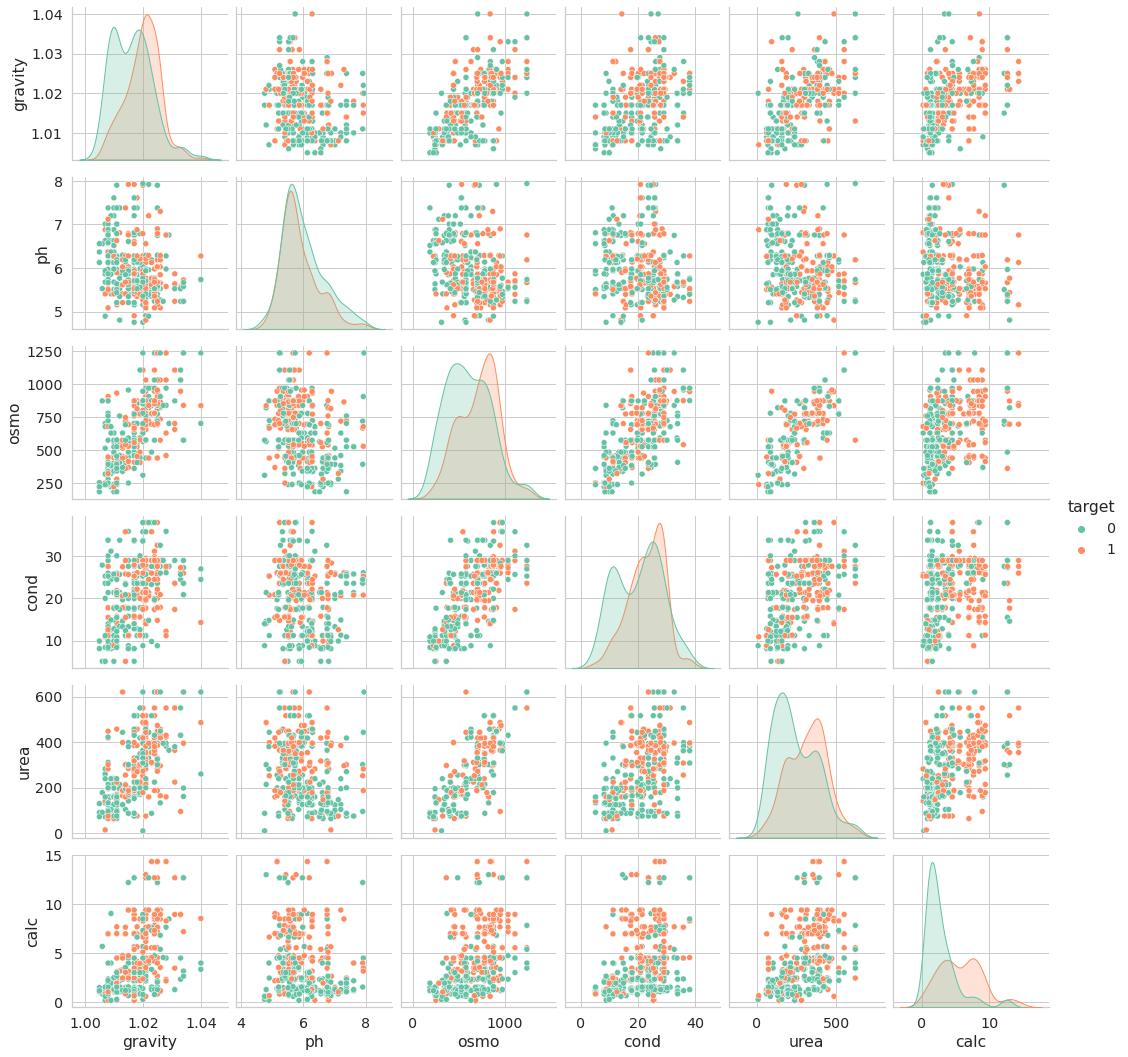

In [888]:
sns.pairplot(train, hue='target')
plt.show()

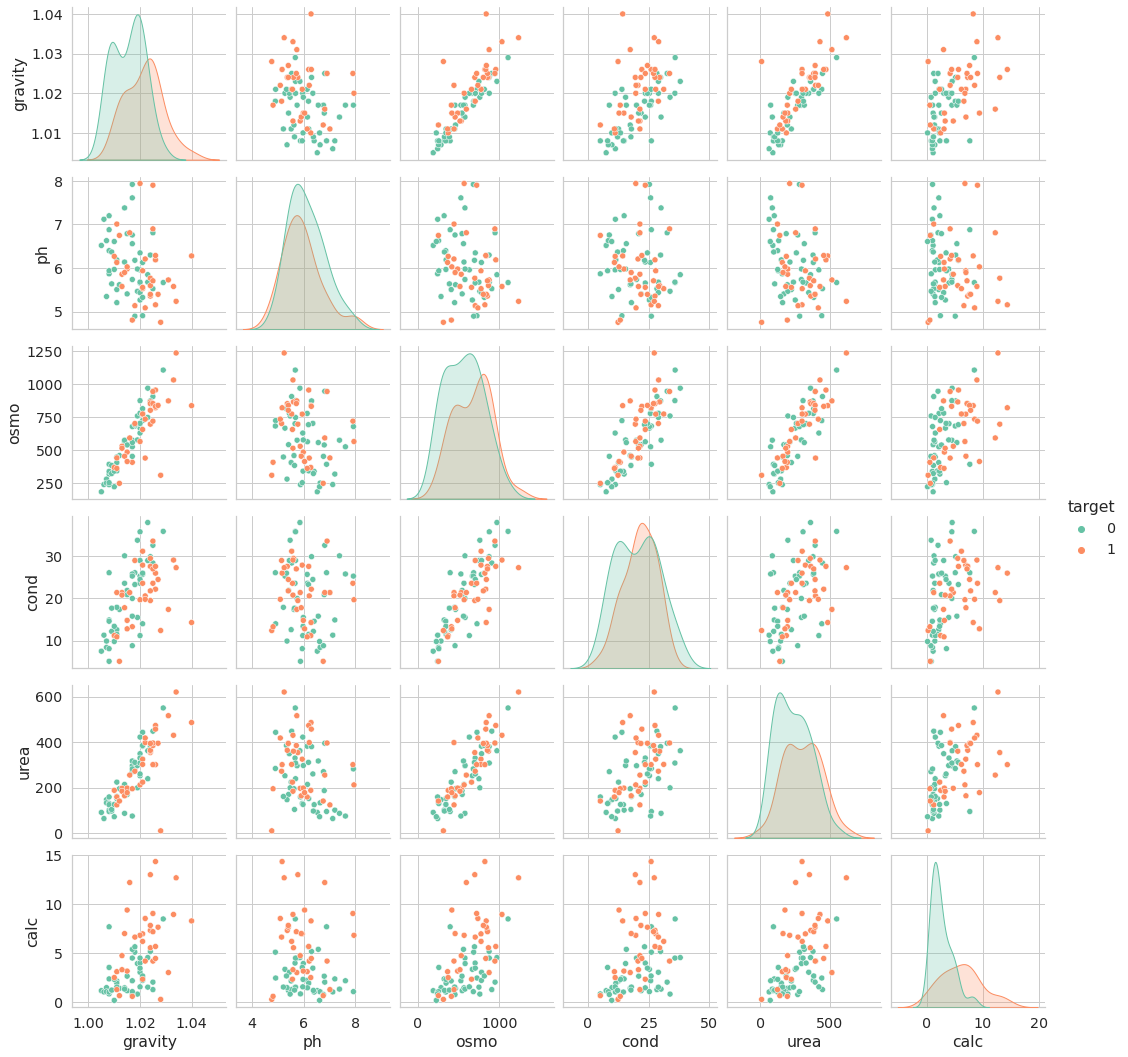

In [889]:
sns.pairplot(real, hue='target')
plt.show()

### Feature Generating

In [890]:
train = pd.concat([train, real], ignore_index=True)
train

,gravity,ph,osmo,cond,urea,calc,target
0,1.013,6.19,443,14.8,124,1.45,0
1,1.025,5.40,703,23.6,394,4.18,0
2,1.009,6.13,371,24.5,159,9.04,0
3,1.021,4.91,442,20.8,398,6.63,1
4,1.021,5.53,874,17.8,385,2.21,1
...,...,...,...,...,...,...,...
488,1.025,7.90,721,23.6,301,9.04,1
489,1.017,4.81,410,13.3,195,0.58,1
490,1.024,5.40,803,21.8,394,7.82,1
491,1.016,6.81,594,21.4,255,12.20,1


In [891]:
train.drop_duplicates(inplace=True)

In [892]:
X = train.iloc[:,:-1]
y = train[['target']]

In [893]:
import copy

In [894]:
X_new = np.log(X)


data = copy.deepcopy(X)
    
#     # Feature Engineering
    
# print(data)
#     # Ion product of calcium and urea
data["ion_product"] = data["calc"] * data["urea"]

#     # Calcium-to-urea ratio
data["calcium_to_urea_ratio"] = data["calc"] / data["urea"]

#     # Electrolyte balance
data["electrolyte_balance"] = data["cond"] / (10 ** (-data["ph"]))

#     # Osmolality-to-specific gravity ratio
data["osmolality_to_sg_ratio"] = data["osmo"] / data["gravity"]
    
#     # The product of osmolarity and density is created as a new property
data['osmo_density'] = data['osmo'] * data['gravity']
    
#     # ******************************************************************
    
#     # Calculate ammonium concentration (assuming ammonium is not directly measured)
data['ammonium_concentration'] = (data['gravity'] - 1.010) * (140 - (2 * data["ph"])) * 1.2

#     # Calculate phosphate concentration (assuming phosphate is not directly measured)
data['phosphate_concentration'] = (data['gravity'] - 1.010) * (32 - (0.06 * data["ph"]))

#     # *****************************************************************
    
data["gravity/ph"] = data["gravity"] / data["ph"]
data["osmo/cond"] = data["osmo"] / data["cond"]
data["gravity*ph"] = data["gravity"] * data["ph"]
data["osmo*urea"] = data["osmo"] * data["urea"]
data["cond_urea_ph"] = data["cond"] * data["urea"] / data["ph"]
data["ph*osmo"] = data["ph"] * data["osmo"]
data["cond*calc"] = data["cond"] * data["calc"]
data["gravity/calc"] = data["gravity"] / data["calc"]

data

,gravity,ph,osmo,cond,urea,calc,ion_product,calcium_to_urea_ratio,electrolyte_balance,osmolality_to_sg_ratio,...,ammonium_concentration,phosphate_concentration,gravity/ph,osmo/cond,gravity*ph,osmo*urea,cond_urea_ph,ph*osmo,cond*calc,gravity/calc
0,1.013,6.19,443,14.8,124,1.45,179.80,0.011694,2.292249e+07,437.314906,...,0.459432,0.094886,0.163651,29.932432,6.27047,54932,296.478191,2742.17,21.460,0.698621
1,1.025,5.40,703,23.6,394,4.18,1646.92,0.010609,5.928052e+06,685.853659,...,2.325600,0.475140,0.189815,29.788136,5.53500,276982,1721.925926,3796.20,98.648,0.245215
2,1.009,6.13,371,24.5,159,9.04,1437.36,0.056855,3.304959e+07,367.690783,...,-0.153288,-0.031632,0.164600,15.142857,6.18517,58989,635.481240,2274.23,221.480,0.111615
3,1.021,4.91,442,20.8,398,6.63,2638.74,0.016658,1.690687e+06,432.908913,...,1.718376,0.348759,0.207943,21.250000,5.01311,175916,1686.028513,2170.22,137.904,0.153997
4,1.021,5.53,874,17.8,385,2.21,850.85,0.005740,6.031426e+06,856.023506,...,1.702008,0.348350,0.184629,49.101124,5.64613,336490,1239.240506,4833.22,39.338,0.461991
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
488,1.025,7.90,721,23.6,301,9.04,2721.04,0.030033,1.874615e+09,703.414634,...,2.235600,0.472890,0.129747,30.550847,8.09750,217021,899.189873,5695.90,213.344,0.113385
489,1.017,4.81,410,13.3,195,0.58,113.10,0.002974,8.587201e+05,403.146509,...,1.095192,0.221980,0.211435,30.827068,4.89177,79950,539.189189,1972.10,7.714,1.753448
490,1.024,5.40,803,21.8,394,7.82,3081.08,0.019848,5.475912e+06,784.179688,...,2.170560,0.443464,0.189630,36.834862,5.52960,316382,1590.592593,4336.20,170.476,0.130946
491,1.016,6.81,594,21.4,255,12.20,3111.00,0.047843,1.381700e+08,584.645669,...,0.909936,0.189548,0.149192,27.757009,6.91896,151470,801.321586,4045.14,261.080,0.083279


In [895]:

# data = copy.deepcopy(test)
    
    # Feature Engineering
    
# print(data)/
    # Ion product of calcium and urea
test["ion_product"] = test["calc"] * test["urea"]

    # Calcium-to-urea ratio
test["calcium_to_urea_ratio"] = test["calc"] / test["urea"]

    # Electrolyte balance
test["electrolyte_balance"] = test["cond"] / (10 ** (-test["ph"]))

    # Osmolality-to-specific gravity ratio
test["osmolality_to_sg_ratio"] = test["osmo"] / test["gravity"]
    
    # The product of osmolarity and density is created as a new property
test['osmo_density'] = test['osmo'] * test['gravity']
    
    # ******************************************************************
    
    # Calculate ammonium concentration (assuming ammonium is not directly measured)
test['ammonium_concentration'] = (test['gravity'] - 1.010) * (140 - (2 * test["ph"])) * 1.2

    # Calculate phosphate concentration (assuming phosphate is not directly measured)
test['phosphate_concentration'] = (test['gravity'] - 1.010) * (32 - (0.06 * test["ph"]))

    # *****************************************************************
    
test["gravity/ph"] = test["gravity"] / test["ph"]
test["osmo/cond"] = test["osmo"] / test["cond"]
test["gravity*ph"] = test["gravity"] * test["ph"]
test["osmo*urea"] = test["osmo"] * test["urea"]
test["cond_urea_ph"] = test["cond"] * test["urea"] / test["ph"]
test["ph*osmo"] = test["ph"] * test["osmo"]
test["cond*calc"] = test["cond"] * test["calc"]
test["gravity/calc"] = test["gravity"] / test["calc"]

test

,gravity,ph,osmo,cond,urea,calc,ion_product,calcium_to_urea_ratio,electrolyte_balance,osmolality_to_sg_ratio,...,ammonium_concentration,phosphate_concentration,gravity/ph,osmo/cond,gravity*ph,osmo*urea,cond_urea_ph,ph*osmo,cond*calc,gravity/calc
id,,,,,,,,,,,,,,,,,,,,,
414,1.017,5.24,345,11.5,152,1.16,176.32,0.007632,1.998471e+06,339.233038,...,1.087968,0.221799,0.194084,30.000000,5.32908,52440,333.587786,1807.80,13.340,0.876724
415,1.020,5.68,874,29.0,385,3.46,1332.10,0.008987,1.388027e+07,856.862745,...,1.543680,0.316592,0.179577,30.137931,5.79360,336490,1965.669014,4964.32,100.340,0.294798
416,1.024,5.36,698,19.5,354,13.00,4602.00,0.036723,4.467192e+06,681.640625,...,2.171904,0.443498,0.191045,35.794872,5.48864,247092,1287.873134,3741.28,253.500,0.078769
417,1.020,5.33,668,25.3,252,3.46,871.92,0.013730,5.409044e+06,654.901961,...,1.552080,0.316802,0.191370,26.403162,5.43660,168336,1196.172608,3560.44,87.538,0.294798
418,1.011,5.87,567,29.0,457,2.36,1078.52,0.005164,2.149800e+07,560.830861,...,0.153912,0.031648,0.172232,19.551724,5.93457,259119,2257.751278,3328.29,68.440,0.428390
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,1.029,6.27,853,21.4,364,7.31,2660.84,0.020082,3.984866e+07,828.960155,...,2.906088,0.600852,0.164115,39.859813,6.45183,310492,1242.360447,5348.31,156.434,0.140766
686,1.012,5.62,410,14.0,195,1.45,282.75,0.007436,5.836171e+06,405.138340,...,0.309024,0.063326,0.180071,29.285714,5.68744,79950,485.765125,2304.20,20.300,0.697931
687,1.031,5.68,874,29.0,380,4.49,1706.20,0.011816,1.388027e+07,847.720660,...,3.241728,0.664843,0.181514,30.137931,5.85608,332120,1940.140845,4964.32,130.210,0.229621


In [896]:
X = data
X

,gravity,ph,osmo,cond,urea,calc,ion_product,calcium_to_urea_ratio,electrolyte_balance,osmolality_to_sg_ratio,...,ammonium_concentration,phosphate_concentration,gravity/ph,osmo/cond,gravity*ph,osmo*urea,cond_urea_ph,ph*osmo,cond*calc,gravity/calc
0,1.013,6.19,443,14.8,124,1.45,179.80,0.011694,2.292249e+07,437.314906,...,0.459432,0.094886,0.163651,29.932432,6.27047,54932,296.478191,2742.17,21.460,0.698621
1,1.025,5.40,703,23.6,394,4.18,1646.92,0.010609,5.928052e+06,685.853659,...,2.325600,0.475140,0.189815,29.788136,5.53500,276982,1721.925926,3796.20,98.648,0.245215
2,1.009,6.13,371,24.5,159,9.04,1437.36,0.056855,3.304959e+07,367.690783,...,-0.153288,-0.031632,0.164600,15.142857,6.18517,58989,635.481240,2274.23,221.480,0.111615
3,1.021,4.91,442,20.8,398,6.63,2638.74,0.016658,1.690687e+06,432.908913,...,1.718376,0.348759,0.207943,21.250000,5.01311,175916,1686.028513,2170.22,137.904,0.153997
4,1.021,5.53,874,17.8,385,2.21,850.85,0.005740,6.031426e+06,856.023506,...,1.702008,0.348350,0.184629,49.101124,5.64613,336490,1239.240506,4833.22,39.338,0.461991
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
488,1.025,7.90,721,23.6,301,9.04,2721.04,0.030033,1.874615e+09,703.414634,...,2.235600,0.472890,0.129747,30.550847,8.09750,217021,899.189873,5695.90,213.344,0.113385
489,1.017,4.81,410,13.3,195,0.58,113.10,0.002974,8.587201e+05,403.146509,...,1.095192,0.221980,0.211435,30.827068,4.89177,79950,539.189189,1972.10,7.714,1.753448
490,1.024,5.40,803,21.8,394,7.82,3081.08,0.019848,5.475912e+06,784.179688,...,2.170560,0.443464,0.189630,36.834862,5.52960,316382,1590.592593,4336.20,170.476,0.130946
491,1.016,6.81,594,21.4,255,12.20,3111.00,0.047843,1.381700e+08,584.645669,...,0.909936,0.189548,0.149192,27.757009,6.91896,151470,801.321586,4045.14,261.080,0.083279


## Learning stage

In [897]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss, accuracy_score, f1_score, classification_report, roc_auc_score
from sklearn.preprocessing import PolynomialFeatures

In [898]:
def print_metrics(y_true, y_pred):    
    print('\n-------------------- Key Metrics --------------------')
    print('ROC_AUC: {:.4f}'.format(roc_auc_score(y_true, y_pred)))
    print('LogLoss: {:.4f}'.format(log_loss(y_true, y_pred)))
    # print('Accuracy: {:.4f}'.format(accuracy_score(y_true, y_pred)))
    # print('\n--------------- Classification Report ---------------\n')
    # print(classification_report(y_true, y_pred))

In [899]:
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, 
                                                    train_size=0.8,
                                                    random_state=42, 
                                                    )

### Logistic Regression

In [900]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

In [901]:
lrc =  LogisticRegression(random_state=120)
lrc.fit(X_train, y_train)

LogisticRegression(random_state=120)

In [902]:
print_metrics(y_test, lrc.predict_proba(X_test)[:,1])


-------------------- Key Metrics --------------------
ROC_AUC: 0.7813
LogLoss: 0.5920


In [903]:
lrc.coef_

array([[-2.29728659e-07, -1.40100033e-06, -6.91867914e-05,
        -3.24705450e-06, -1.49580404e-05,  1.25052347e-06,
         4.79691426e-04,  2.57904823e-09,  3.45815835e-10,
        -6.92448903e-05, -6.91111610e-05,  1.64956624e-07,
         3.42239115e-08, -3.78044374e-08, -6.51119353e-06,
        -1.40795091e-06,  4.23954596e-06, -3.15383361e-05,
        -4.05336186e-04,  3.18119563e-05, -3.40955809e-07]])

### Random Forest

In [904]:
from sklearn.ensemble import RandomForestClassifier

In [905]:
crf = RandomForestClassifier(max_depth=2, n_estimators=2000, random_state=120, n_jobs=4)
crf.fit(X_train, y_train)

RandomForestClassifier(max_depth=2, n_estimators=2000, n_jobs=4,
                       random_state=120)

In [906]:
print_metrics(y_test, crf.predict_proba(X_test)[:,1])



-------------------- Key Metrics --------------------
ROC_AUC: 0.8566
LogLoss: 0.5028


In [907]:
crf.feature_importances_

array([0.02411436, 0.00207671, 0.00808245, 0.01129835, 0.02657995,
       0.16791108, 0.11201546, 0.07164925, 0.00514875, 0.01025753,
       0.01614719, 0.03789339, 0.03328259, 0.00339829, 0.00847657,
       0.0030811 , 0.02956389, 0.03662634, 0.01080333, 0.20008032,
       0.18151309])

### XGBoost

In [908]:
import xgboost as xgb
import multiprocessing

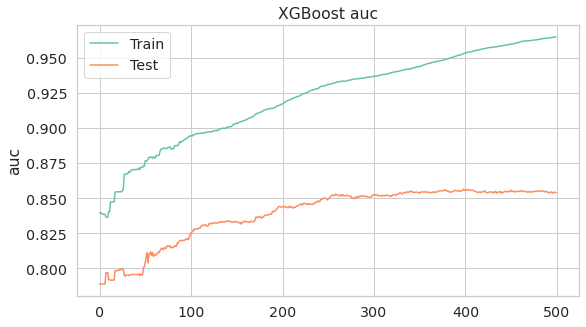

In [923]:
xgb_clf = xgb.XGBClassifier(n_jobs=multiprocessing.cpu_count() // 2, max_depth=3, 
                            random_state=120,
                            n_estimators=500, 
                        learning_rate=0.01,
                        # gamma=2,
                        alpha=0.001,
                        reg_lambda=0.2, # default L2 value
                        subsample=1, # default subsample value
                        # sampling_method='uniform',
                        eval_metric = 'auc',
                        tree_method='auto',
                        colsample_bytree=1, # default colsample_bytree value
                        # early_stopping_rounds=10,
                        objective='binary:logistic',
                        # bagging_temperature = 0.7,
                        # seed=7777
                        )


# skf = StratifiedKFold(n_splits = 10, random_state = 42, shuffle = True)
# for i, (train_idx, test_idx) in enumerate(skf.split(X, Y)):
#          ## Splitting the data 
#     X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
#     Y_train, Y_test = Y.iloc[train_idx], Y.iloc[test_idx]
                
#     ## Building XGBoost model
#     model = CatBoostClassifier(loss_function = 'Logloss',
#                                iterations = 500,
#                                learning_rate = 0.01,
#                                depth = 4,
#                                random_strength = 0.5,
#                                bagging_temperature = 0.7,
#                                border_count = 30,
#                                l2_leaf_reg = 5,
#                                verbose = False, 
#                                task_type = 'CPU').fit(X_train, Y_train)
    
        
xgb_clf.fit(X_train, y_train,
        verbose=0,
        eval_set=[(X_train, y_train), (X_test, y_test)])

results = xgb_clf.evals_result()
epochs = len(results['validation_0']['auc'])
x_axis = range(0, epochs)

fig, ax = plt.subplots(figsize=(9,5))
ax.plot(x_axis, results['validation_0']['auc'], label='Train')
ax.plot(x_axis, results['validation_1']['auc'], label='Test')
ax.legend()
plt.ylabel('auc')
plt.title('XGBoost auc')
plt.show()

In [924]:
print_metrics(y_test, xgb_clf.predict_proba(X_test)[:,1])



-------------------- Key Metrics --------------------
ROC_AUC: 0.8541
LogLoss: 0.4846


In [911]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import StackingClassifier, ExtraTreesClassifier
from xgboost import XGBClassifier

In [912]:
seed = 42
splits = 10
repeats = 10

xgb_params = {
    'seed': seed,
    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'learning_rate' : 0.1
}

np.random.seed(seed)
predictions = np.zeros(len(test))
train_scores, val_scores = [], []
k = RepeatedStratifiedKFold(n_splits=splits, random_state=seed, n_repeats = repeats)
for fold, (train_idx, val_idx) in enumerate(k.split(X, y)):
    
    stack = StackingClassifier(
        [
            ('xgb', XGBClassifier(**xgb_params)),
            ('lr', LogisticRegression(random_state = seed, max_iter = 10000)),
            ('ext', ExtraTreesClassifier(random_state = seed)),
            ('rf', RandomForestClassifier(n_estimators=2000, random_state=120, n_jobs=4))
        ]
    )
    
    stack.fit(X.iloc[train_idx], y.iloc[train_idx])
    
    train_preds = stack.predict_proba(X.iloc[train_idx])[:,1]
    val_preds = stack.predict_proba(X.iloc[val_idx])[:,1]
    
    train_score = roc_auc_score(y.iloc[train_idx], train_preds)
    val_score = roc_auc_score(y.iloc[val_idx], val_preds)
    
    train_scores.append(train_score)
    val_scores.append(val_score)
    
    predictions += stack.predict_proba(test)[:,1] / splits / repeats
    #print(f'Fold {fold // repeats} Iteration {fold % repeats}: val ROC = {val_score:.5f} | train ROC = {train_score:.5f}')

print(f'Average val ROC = {np.mean(val_scores):.5f} | train ROC {np.mean(train_scores):.5f}')
stack_preds = predictions.copy()


Average val ROC = 0.81142 | train ROC 0.99997


In [918]:
predictions

array([0.26125555, 0.54534573, 0.84185257, 0.35539808, 0.38592924,
       0.69178919, 0.67946056, 0.57646388, 0.26774953, 0.18773571,
       0.46370106, 0.15387926, 0.8315833 , 0.60564589, 0.5548085 ,
       0.40606327, 0.82389615, 0.21062739, 0.28084901, 0.14150969,
       0.17865179, 0.20410875, 0.49687044, 0.59907619, 0.80174431,
       0.26836679, 0.43181193, 0.1389708 , 0.23307823, 0.82952265,
       0.77732692, 0.61679847, 0.65039765, 0.64490687, 0.69857956,
       0.68641864, 0.63057985, 0.58928104, 0.19327361, 0.7       ,
       0.49441882, 0.502083  , 0.84355003, 0.41909599, 0.83424533,
       0.5833804 , 0.83414065, 0.38466655, 0.43994678, 0.15133546,
       0.71392245, 0.76164862, 0.47635515, 0.15580456, 0.44827398,
       0.25566305, 0.714201  , 0.2707204 , 0.41918805, 0.68250705,
       0.47670545, 0.15777596, 0.41166487, 0.19682576, 0.21223655,
       0.75481401, 0.13539212, 0.71486958, 0.1729271 , 0.30828636,
       0.18743542, 0.69903579, 0.17456599, 0.29060834, 0.65088

In [914]:
# sns.histplot(xgb_clf.feature_importances_, bins=66, hue=X.columns.to_list())

In [915]:

# data = copy.deepcopy(test)
    
#     # Feature Engineering
    
# print(data)
#     # Ion product of calcium and urea
# test["ion_product"] = test["calc"] * test["urea"]

#     # Calcium-to-urea ratio
# data["calcium_to_urea_ratio"] = data["calc"] / data["urea"]

#     # Electrolyte balance
# test["electrolyte_balance"] = test["cond"] / (10 ** (-test["ph"]))

#     # Osmolality-to-specific gravity ratio
# data["osmolality_to_sg_ratio"] = data["osmo"] / data["gravity"]
    
#     # The product of osmolarity and density is created as a new property
# data['osmo_density'] = data['osmo'] * data['gravity']
    
#     # ******************************************************************
    
#     # Calculate ammonium concentration (assuming ammonium is not directly measured)
# data['ammonium_concentration'] = (data['gravity'] - 1.010) * (140 - (2 * data["ph"])) * 1.2

#     # Calculate phosphate concentration (assuming phosphate is not directly measured)
# data['phosphate_concentration'] = (data['gravity'] - 1.010) * (32 - (0.06 * data["ph"]))

#     # *****************************************************************
    
# data["gravity/ph"] = data["gravity"] / data["ph"]
# data["osmo/cond"] = data["osmo"] / data["cond"]
# data["gravity*ph"] = data["gravity"] * data["ph"]
# data["osmo*urea"] = data["osmo"] * data["urea"]
# data["cond_urea_ph"] = data["cond"] * data["urea"] / data["ph"]
# data["ph*osmo"] = data["ph"] * data["osmo"]
# data["cond*calc"] = data["cond"] * data["calc"]
# data["gravity/calc"] = data["gravity"] / data["calc"]

# data

In [916]:
sub = pd.read_csv('./data/sample_submission.csv')
sub['target'] = xgb_clf.predict_proba(test)[:, 1]
xgb_clf.predict_proba(test)[:, 1]



array([0.11111198, 0.5374181 , 0.8541036 , 0.37155014, 0.48843572,
       0.6634871 , 0.62516737, 0.5946586 , 0.3413819 , 0.05764414,
       0.33725455, 0.11791249, 0.86218435, 0.6411496 , 0.27706316,
       0.62398857, 0.8164835 , 0.28918868, 0.34639   , 0.05130598,
       0.17820477, 0.35452023, 0.4504947 , 0.69009435, 0.8523838 ,
       0.58771557, 0.5064656 , 0.05635332, 0.2598453 , 0.87914515,
       0.83110625, 0.5487239 , 0.52046484, 0.5946586 , 0.61334985,
       0.6622179 , 0.70859987, 0.6517329 , 0.11372215, 0.72214025,
       0.33860534, 0.5629574 , 0.9248484 , 0.54355943, 0.89274377,
       0.8658575 , 0.9055794 , 0.5478767 , 0.5427829 , 0.17641626,
       0.8536906 , 0.8150355 , 0.2765846 , 0.13004573, 0.54334056,
       0.15641233, 0.6448174 , 0.14273514, 0.18061623, 0.6619086 ,
       0.53107244, 0.11852575, 0.2819832 , 0.11554643, 0.2544223 ,
       0.7991985 , 0.09617686, 0.82216656, 0.27454916, 0.27938464,
       0.14181045, 0.67105055, 0.36409372, 0.20993891, 0.57703

In [925]:
sub.to_csv('submission.csv', index=False)